## Introduction to neural network classification with TensorFlow

In this notebook we're going to classify something as one thing or another.

A few types of classfication problems:
  * Binary classification
  * Multiclass Classification
  * Multilabel Classification



## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y=  make_circles(n_samples,
                    noise=0.03,
                    random_state = 42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## let's Visualize the data!


In [ ]:
import pandas as pd
circles= pd.DataFrame({"XO": X[:, 0], "X1": X[:, 1], "label":y})
circles

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


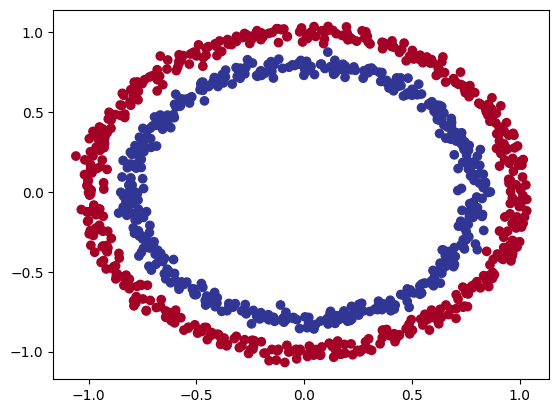

In [ ]:
# Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [ ]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first sample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
import tensorflow as tf

# random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model.fit(X, y , epochs=100)

Epoch 1/100
32/32 [==============================] - 7s 6ms/step - loss: 5.8726 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8366 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 5.8299 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 5.8164 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7320 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 5.6907 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 5.6852 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6262 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5281 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4850 - accuracy: 0.4780
Epoch 11/

In [ ]:
model.fit(X, y , epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 3.0727 - accuracy: 0.4710
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 3.0193 - accuracy: 0.4720
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 2.8633 - accuracy: 0.4700
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 2.7135 - accuracy: 0.4710
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 2.4220 - accuracy: 0.4710
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 2.0201 - accuracy: 0.4690
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 1.3356 - accuracy: 0.4660
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9334 - accuracy: 0.4640
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.4630
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.4640
Epoch 11/

Let's add an extra layer

In [ ]:
# set seed
tf.random.set_seed(42)

# create a model
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# fit the model
model_1.fit(tf.expand_dims(X, axis=1), y , epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 3.5114 - accuracy: 0.4944
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7176 - accuracy: 0.5082
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.4944
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5017
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.4979
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5022
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4913
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4927
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4899
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5005
Epoch 11/

In [ ]:
# model 2 with activations
# random seed
tf.random.set_seed(42)

# model creation
model_2 =  tf.keras.Sequential([
    # tf.keras.Input(shape=(1000,2)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
model_2.fit(X, y , epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 1.9688 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4300
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5280
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4500
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5100


[0.7002636194229126, 0.5099999904632568]

In [ ]:
prediction =  model_2.predict(X)

32/32 [==============================] - 0s 1ms/step


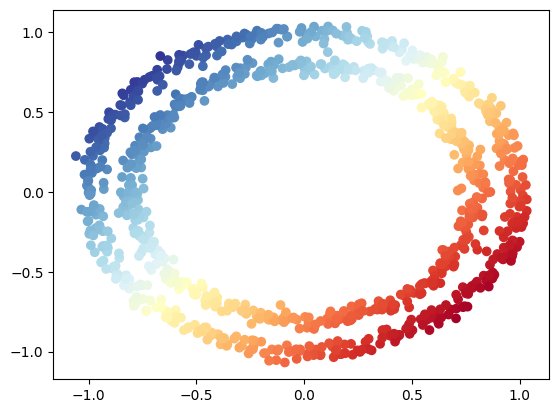

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=plt.cm.RdYlBu)

## To visualize model's predcition, let's create a function `plot_decision_boundary()`, this fucntion will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def pplot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predciting on X
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min,  x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predcition
  y_pred = model.predict(x_in)

  # Check for multi class
  if len(y_pred[0]) >1 :
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred= np.argmax(y_pred, axis=1 ).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s= 40,  cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


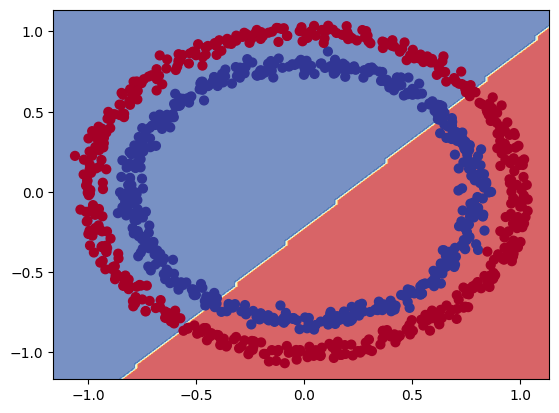

In [ ]:
# check out the prediciton our model is making
pplot_decision_boundary(model=model_2, X=X, y=y)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000 , 5)
y_regression = tf.range(100, 1100, 5) # y = X+100

# split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test= y_regression[150:]

# fit the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs =100)

Epoch 1/100


ValueError: ignored

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the  model
model_2.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100 )

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 326.9243 - mae: 326.9243
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 258.3006 - mae: 258.3006
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 190.6460 - mae: 190.6460
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 118.8953 - mae: 118.8953
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4503 - mae: 51.4503
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 61.1916 - mae: 61.1916
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 66.6267 - mae: 66.6267
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.2974 - mae: 51.2974
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 43.2287 - mae: 43.2287
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0867 - mae: 47.0867
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


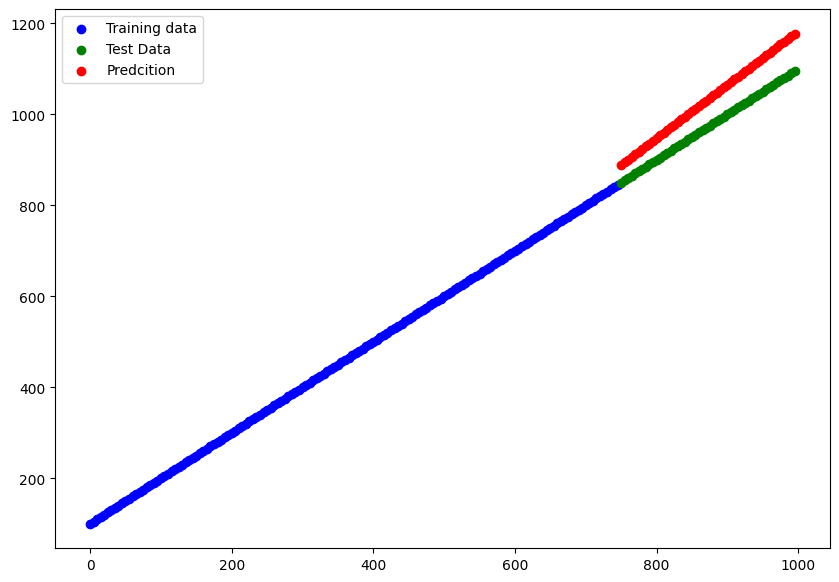

In [ ]:
# make predcition with train model
y_preds =  model_2.predict(X_reg_test)

# plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label ="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_preds, c="r", label = "Predcition")
plt.legend();

# Non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create model
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation ="linear")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]

)

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3625 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3423 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3349 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3046 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2571 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2387 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2269 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2035 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2002 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1977 - accuracy: 0.4730
Epoch 11/

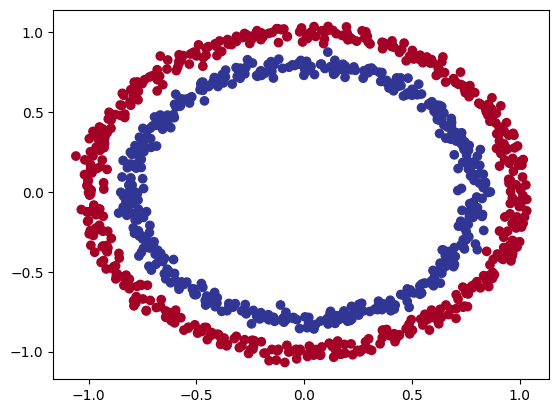

In [ ]:
# check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


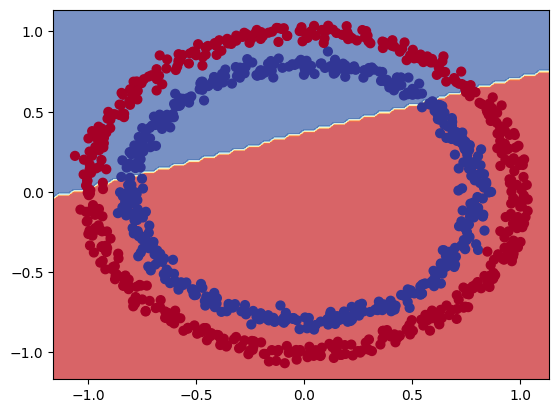

In [ ]:
# check the predcition
pplot_decision_boundary(model= model_3,
                        X=X, y=y)

lets build non linear neural network

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# compile the model
model_4.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# fit the model
history = model_4.fit(X, y , epochs =100)



Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8237 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7986 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7767 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7589 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7559 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7519 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7420 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7278 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7153 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6823 - accuracy: 0.4820
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


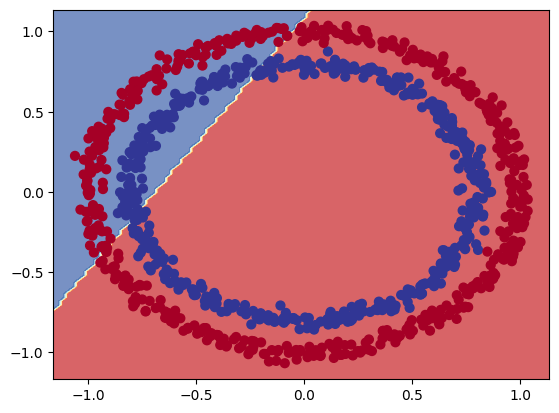

In [ ]:
pplot_decision_boundary(model=model_4,
                        X=X, y=y)

In [ ]:
# increaing layers in model 5

tf.random.set_seed(42)

# create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(30, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# compile the model
model_5.compile(loss= "binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
# fit the model
history = model_5.fit(X, y ,epochs= 30)

Epoch 1/30
32/32 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5110
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6010
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.7220
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.8780
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.9780
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.9970
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9990
Epoch 10/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9990
Epoch 11/30
32/32 [

313/313 [==============================] - 1s 1ms/step
doing binary classification


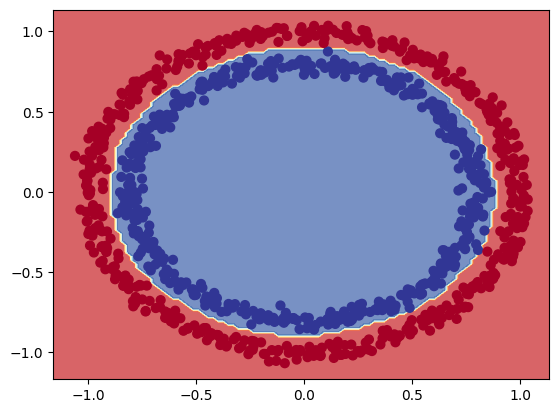

In [ ]:
pplot_decision_boundary(model=model_5, X=X, y=y)

Text(0, 0.5, 'loss')

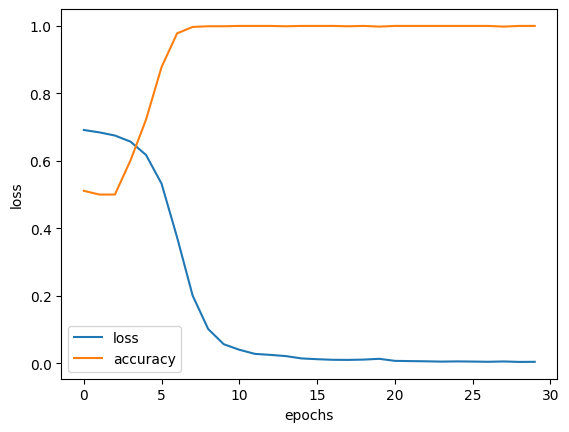

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000


[0.003109409473836422, 1.0]

In [ ]:
# create a toy tensor(Similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

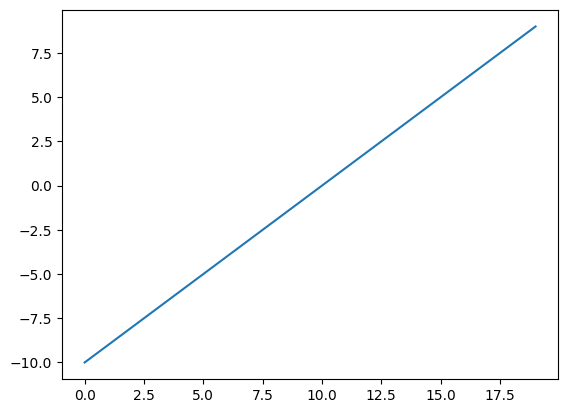

In [ ]:
# visualize our toy tensor
plt.plot(A);

In [ ]:
# let's start by replicating sigmoid - sigmoid(x) =1 /(1 = exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# use the sigmoid function on toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

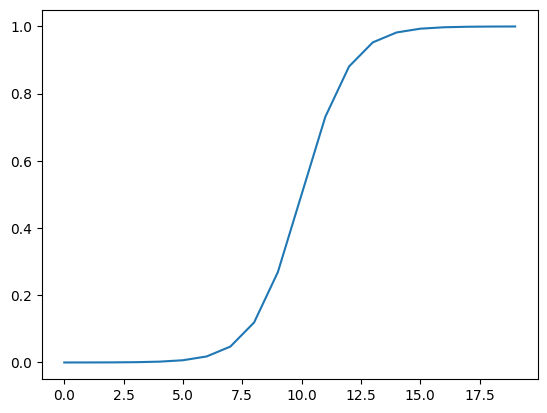

In [ ]:
# plot toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# let's recreate a relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

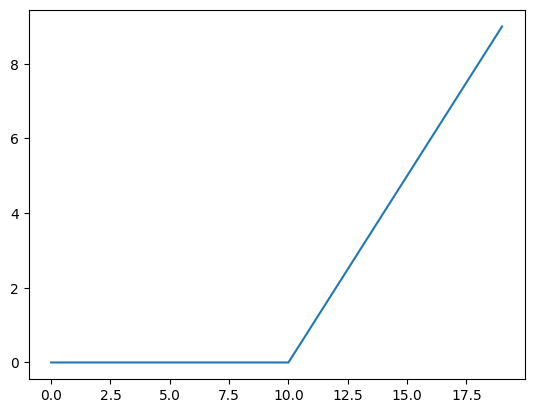

In [ ]:
# plot relu
plt.plot(relu(A));

In [ ]:
# let's try linear acitvation function


## Evaluating and Improving model

In [ ]:
len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=(0.2), random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [ ]:
# recreate model and evaluate data

# set random seed
tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# fit the model
history = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4700
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4825
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4875
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4875
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4875
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4625
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4775
Epoch 11/25
25/25 [

In [ ]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000


[0.693149209022522, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


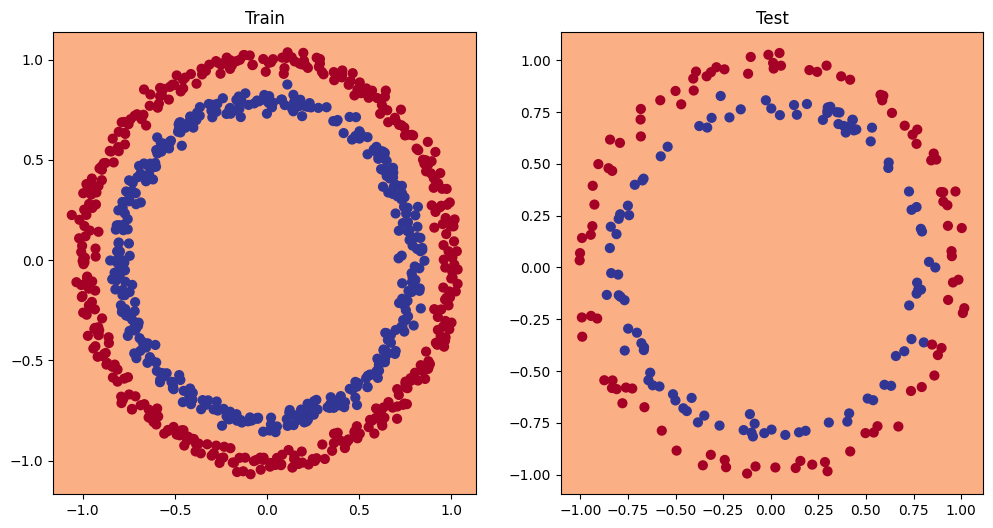

In [ ]:
# plot the decision boundaries for training and test size
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
pplot_decision_boundary(model=model_6, X= X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
pplot_decision_boundary(model=model_6, X=X_test, y=y_test)

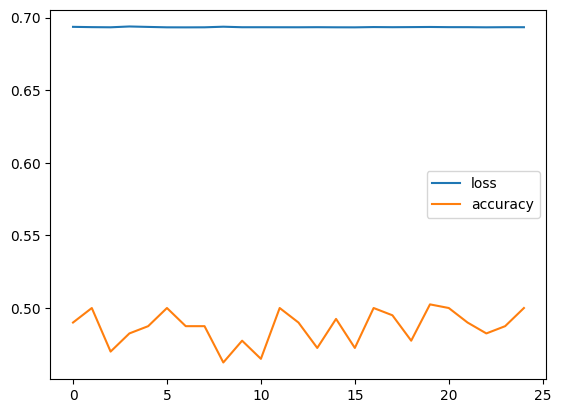

In [ ]:
pd.DataFrame(history.history).plot();

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we' re going to use the following steps:

* A learning rate **callback** - think of as an extra piece of functionality, you can add to your *while* its training.

* Another model

* A Modified loss curve plot.

In [ ]:
from keras.callbacks import learning_rate_schedule
# set random seed
tf.random.set_seed(42)

# create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer= "Adam",
    metrics= ["accuracy"]
)

# create a learning rate callback
learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history = model_7.fit(X_train, y_train, epochs= 100, callbacks=[learning_rate_schedule])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: >

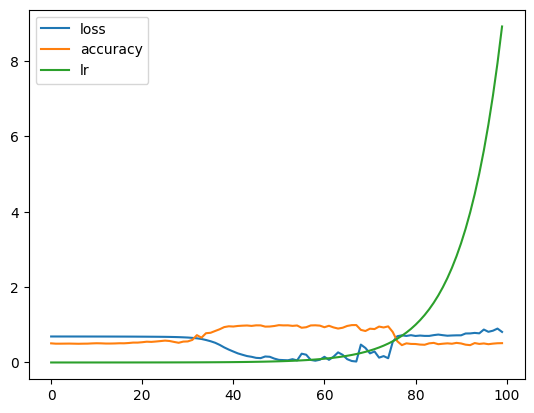

In [ ]:
# checkk out the history
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Learning rate vs loss')

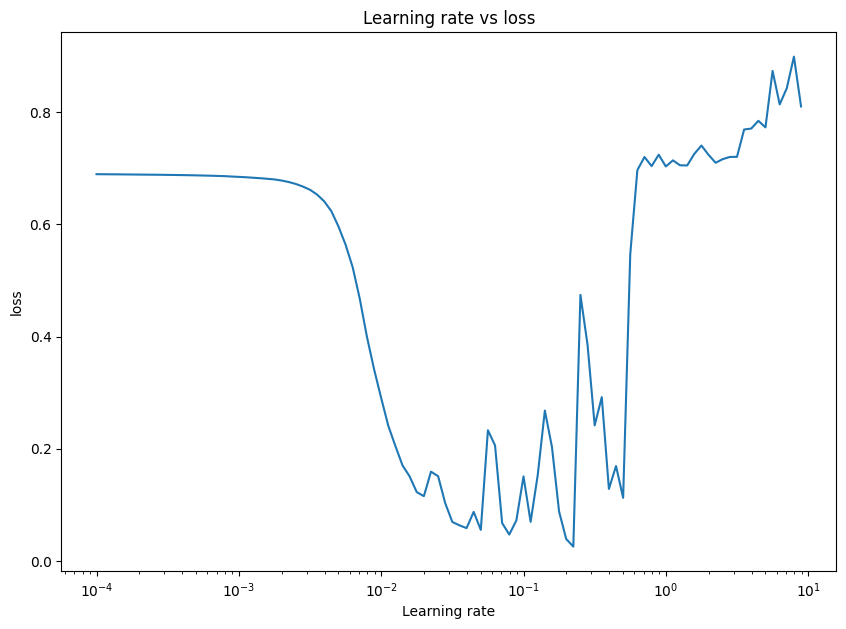

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/(20)))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

In [ ]:
len(lrs)

100

In [ ]:
# let/s try ideal learning rate with same model

# set rndom seed
tf.random.set_seed(42)

# creating model
model_8 =  tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer= tf.keras.optimizers.Adam(learning_rate= 0.02),
    metrics=["accuracy"]
)

# fit the model
history_8 = model_8.fit(X_train, y_train, epochs =20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5188
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5537
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6263
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6087
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.6237
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.6662
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7437
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7912
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7825
Epoch 11/20
25/25 [

In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9569 - accuracy: 0.5000


[0.9569383263587952, 0.5]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9900


[0.11592283844947815, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


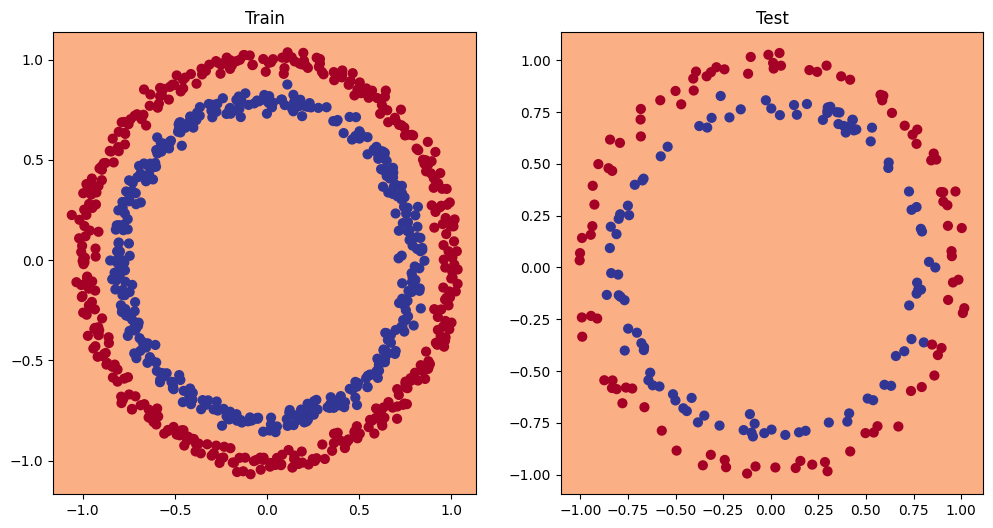

In [ ]:
# plot the decision boundaries for the training for the test and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
pplot_decision_boundary(model=model_6, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
pplot_decision_boundary(model=model_6, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing models results as much as possible, there are a handful of other classification evaluation methods and metrics:
 * Accuracy
 * Precision
 * Recall
 * F1-score
 * Confusion matrix
 * Classification_report from scikilearn



In [ ]:
# check the accuracy of our model
loss, accuracy = model_5.evaluate(X_test, y_test)
print("Model loss on the test set", loss)
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%" )

7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Model loss on the test set 0.005656484980136156
Model accuracy on the test set: 100.00%


In [ ]:
# let's build confusion matrix
from sklearn.metrics import confusion_matrix

# make_prediction
y_preds = model_5.predict(X_test)

# create a confusion matrix
confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_preds[:10]

array([[9.9974006e-01],
       [3.2958696e-03],
       [9.9986100e-01],
       [5.9660553e-05],
       [9.7513473e-01],
       [9.6731871e-01],
       [1.3229875e-05],
       [3.5161956e-06],
       [9.9953485e-01],
       [8.5490674e-04]], dtype=float32)

Oops...looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [ ]:
# convert prediciton probabilities to binary form
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   0],
       [  0, 100]])


prettify our confusion matrix

Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix


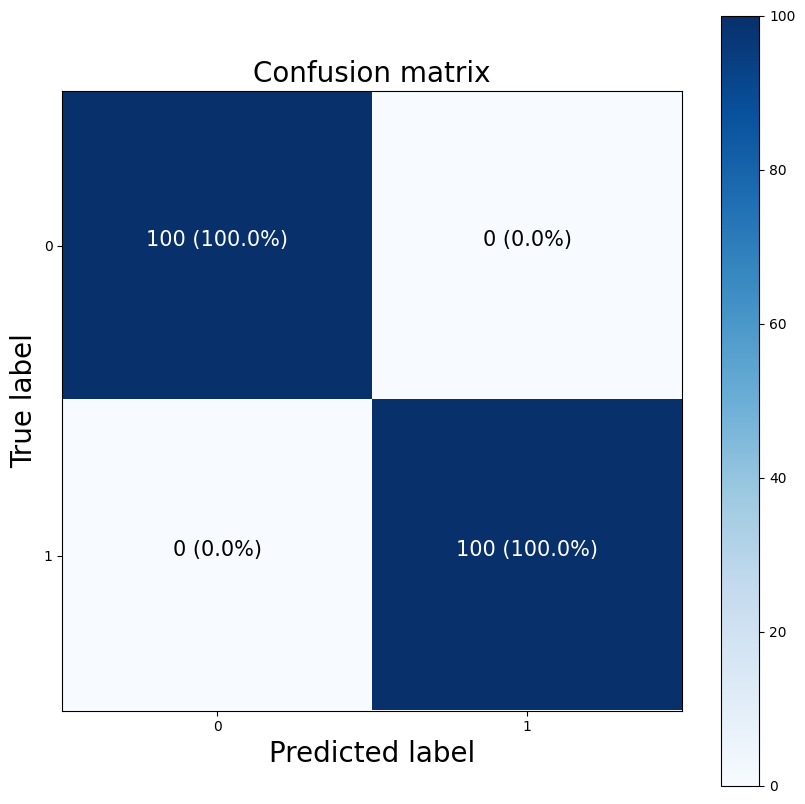

In [ ]:
import itertools

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax= plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks = np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label axis
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set the thresold for different colors
thresold = (cm.max() + cm.min())/2

# plot the textr on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
  horizontalalignment = "center",
  color = "white" if cm[i, j] > thresold else "black",
  size=15)

## Working with a larger example(multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

* This means if you have 3 different classes, it's a multi-class classification
* It also means if you have 100 different classes, it's a multi-class classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# data already sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [ ]:
# show the training example
print(f"Training ssmple:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training ssmple:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

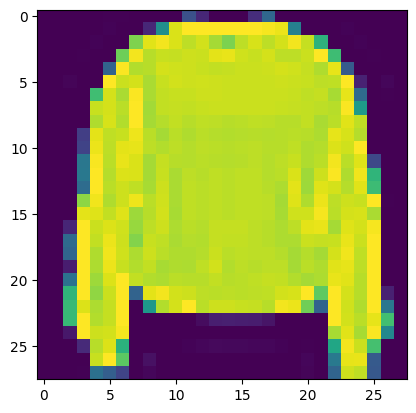

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7]);

In [ ]:
# check out samples label
train_labels[7]

2

In [ ]:
#  Create a small list so we can index onto our training so they're human-readable
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Pullover')

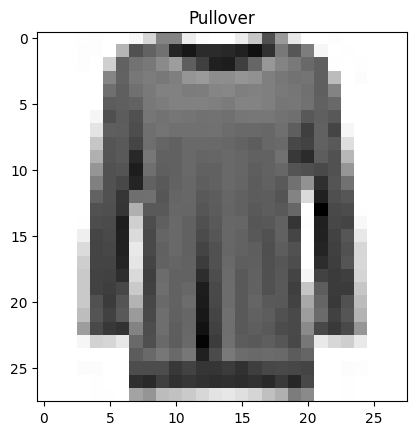

In [ ]:
# plot an example image and its label
index = 199
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

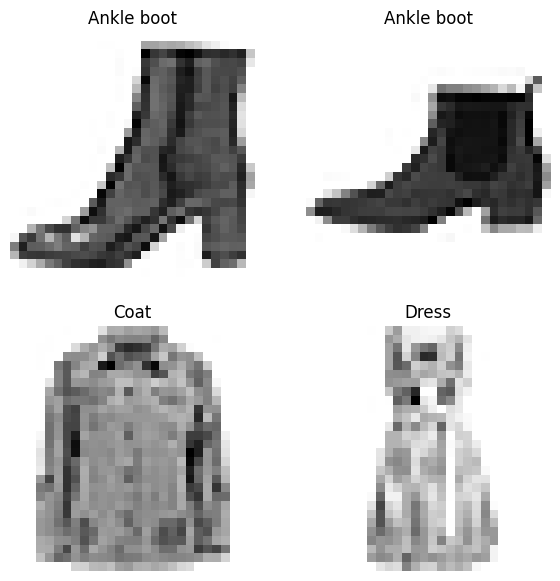

In [ ]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classfiers, however, we're going to have  to tweak a few things

* Input Shape = 28 * 28 (the shape of the image)
* Output shape = 10(one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy
* Outout layer activation = Softmax(not sigmpoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# flatens the data
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

# compile the model
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_10.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))




Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 2.0516 - accuracy: 0.1920 - val_loss: 1.7479 - val_accuracy: 0.2270
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6719 - accuracy: 0.2761 - val_loss: 1.6222 - val_accuracy: 0.3010
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5980 - accuracy: 0.3062 - val_loss: 1.5708 - val_accuracy: 0.3038
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5612 - accuracy: 0.3141 - val_loss: 1.5447 - val_accuracy: 0.3269
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5424 - accuracy: 0.3153 - val_loss: 1.5345 - val_accuracy: 0.3164
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5292 - accuracy: 0.3120 - val_loss: 1.5168 - val_accuracy: 0.3193
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5158 - accuracy: 0.3095 - val_loss: 1.5089 - val_accuracy

<Axes: >

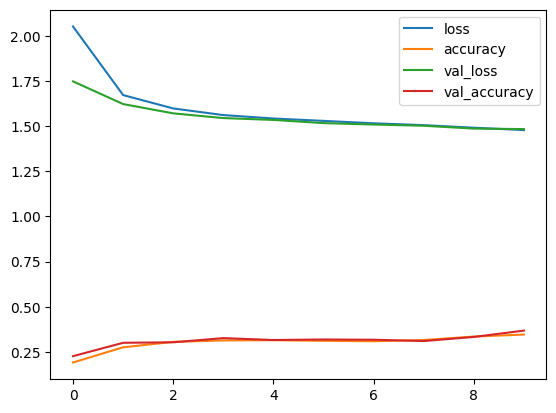

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot()

In [ ]:
# check the model summary
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  check the mean and max of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized) this means they like to have numbers between 0 and 1

In [ ]:
# we can get our training and testing data between 0 and 1 byu dividinf by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max of the scaled data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# building same modell on scaled data
# set random seed
tf.random.set_seed(42)

# create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
norm_history = model_11.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.0851 - accuracy: 0.6159 - val_loss: 0.6589 - val_accuracy: 0.7718
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5902 - accuracy: 0.7955 - val_loss: 0.6115 - val_accuracy: 0.7861
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5423 - accuracy: 0.8113 - val_loss: 0.5667 - val_accuracy: 0.8012
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5236 - accuracy: 0.8173 - val_loss: 0.5443 - val_accuracy: 0.8098
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5135 - accuracy: 0.8205 - val_loss: 0.5727 - val_accuracy: 0.7967
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5038 - accuracy: 0.8247 - val_loss: 0.5429 - val_accuracy: 0.8125
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4986 - accuracy: 0.8261 - val_loss: 0.5454 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

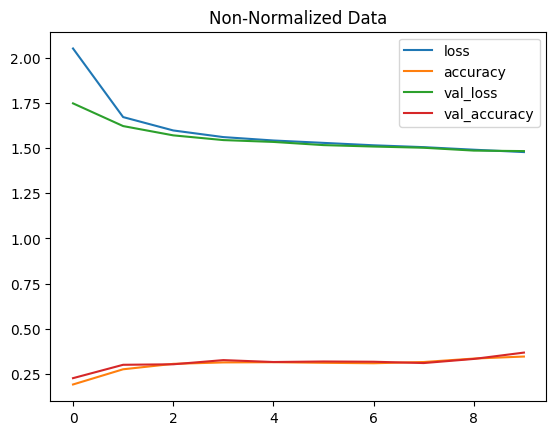

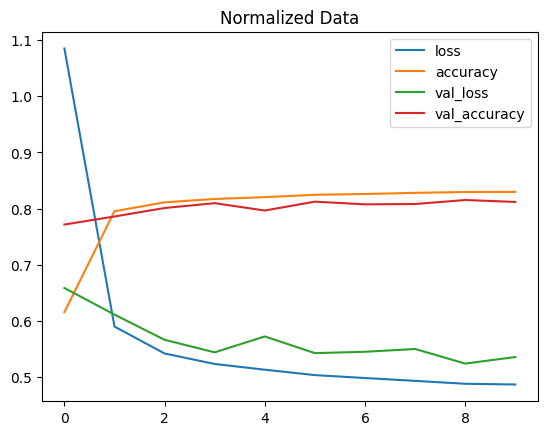

In [ ]:
# plot non norm data
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
# plot norm data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_12.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# learning rate schedule
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_12.fit(train_data_norm, train_labels, epochs=40,validation_data=(test_data_norm, test_labels) ,callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5885 - accuracy: 0.3457 - val_loss: 1.3163 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8519 - accuracy: 0.6886 - val_loss: 0.7009 - val_accuracy: 0.7626 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6403 - accuracy: 0.7804 - val_loss: 0.6773 - val_accuracy: 0.7592 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6079 - accuracy: 0.7914 - val_loss: 0.6309 - val_accuracy: 0.7845 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5948 - accuracy: 0.7930 - val_loss: 0.6182 - val_accuracy: 0.7882 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5863 - accuracy: 0.7957 - val_loss: 0.6457 - val_accuracy: 0.7735 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding ideal learning rate|')

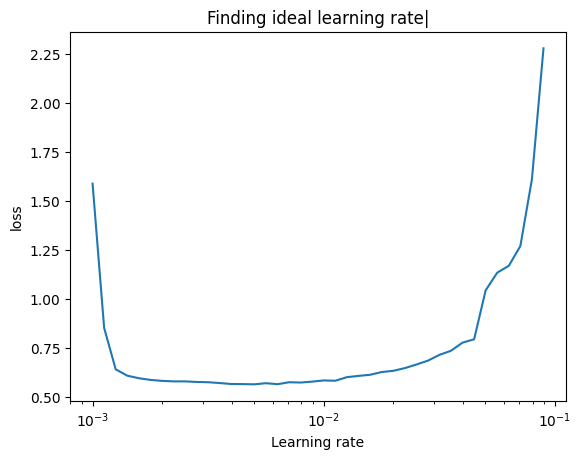

In [ ]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Finding ideal learning rate|")

In [ ]:
# refitting a model with teh ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

# fit the model
model_13.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2970 - accuracy: 0.5312 - val_loss: 1.0242 - val_accuracy: 0.6432
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9084 - accuracy: 0.6759 - val_loss: 0.8778 - val_accuracy: 0.6567
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7900 - accuracy: 0.7201 - val_loss: 0.7679 - val_accuracy: 0.7270
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6909 - accuracy: 0.7721 - val_loss: 0.6825 - val_accuracy: 0.7742
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6485 - accuracy: 0.7861 - val_loss: 0.6709 - val_accuracy: 0.7821
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6259 - accuracy: 0.7927 - val_loss: 0.6655 - val_accuracy: 0.7746
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6080 - accuracy: 0.7983 - val_loss: 0.6413 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15 ):

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax= plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label axis
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the thresold for different colors
  thresold = (cm.max() + cm.min())/2

  # plot the textr on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i, j] > thresold else "black",
    size=15)

In [ ]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make some prediction with model
y_probs = model_13.predict(test_data_norm)#probs is short for predcition probability

# view the first 5 preds
y_probs[:5]


313/313 [==============================] - 1s 2ms/step


array([[6.7613072e-12, 4.6047729e-16, 1.6141186e-21, 3.0613832e-17,
        2.5662514e-29, 8.5968077e-02, 6.9858427e-19, 6.2043961e-02,
        2.5752203e-03, 8.4941280e-01],
       [1.3686569e-02, 9.6070062e-04, 5.4068851e-01, 1.1646866e-02,
        1.3490674e-01, 1.5745677e-07, 2.8713834e-01, 2.3538803e-05,
        1.0948582e-02, 1.7254750e-10],
       [6.5956107e-10, 9.9932849e-01, 1.7408381e-04, 4.1840677e-04,
        7.8954836e-05, 0.0000000e+00, 5.4917551e-09, 1.5305261e-18,
        4.6635211e-13, 0.0000000e+00],
       [1.9522445e-10, 9.9945599e-01, 2.7665783e-05, 4.7881735e-04,
        3.7533428e-05, 0.0000000e+00, 9.7095831e-10, 2.7518318e-20,
        6.6922671e-15, 0.0000000e+00],
       [1.6539985e-01, 3.3748533e-05, 3.1318150e-02, 2.1814806e-02,
        3.8361531e-02, 1.6336449e-05, 7.3902160e-01, 1.4783115e-04,
        3.8861893e-03, 1.3305899e-08]], dtype=float32)

In [ ]:
# convert all of the prediction probabilties into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10prediction
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[713,   1,  11, 112,   4,   1, 118,   0,  40,   0],
       [  1, 950,  13,  31,   1,   0,   2,   0,   2,   0],
       [ 13,   2, 719,  11, 143,   0,  83,   0,  29,   0],
       [ 51,  17,  19, 822,  31,   0,  51,   0,   9,   0],
       [  0,   6, 156,  28, 707,   0, 102,   0,   1,   0],
       [  0,   0,   0,   0,   0, 900,   0,  46,   8,  46],
       [130,   0, 135,  64, 108,   0, 529,   0,  34,   0],
       [  0,   0,   0,   0,   0,  34,   0, 901,   0,  65],
       [ 10,   0,   9,   5,   2,   3,  21,   4, 944,   2],
       [  0,   0,   0,   0,   0,  22,   1,  33,   1, 943]])

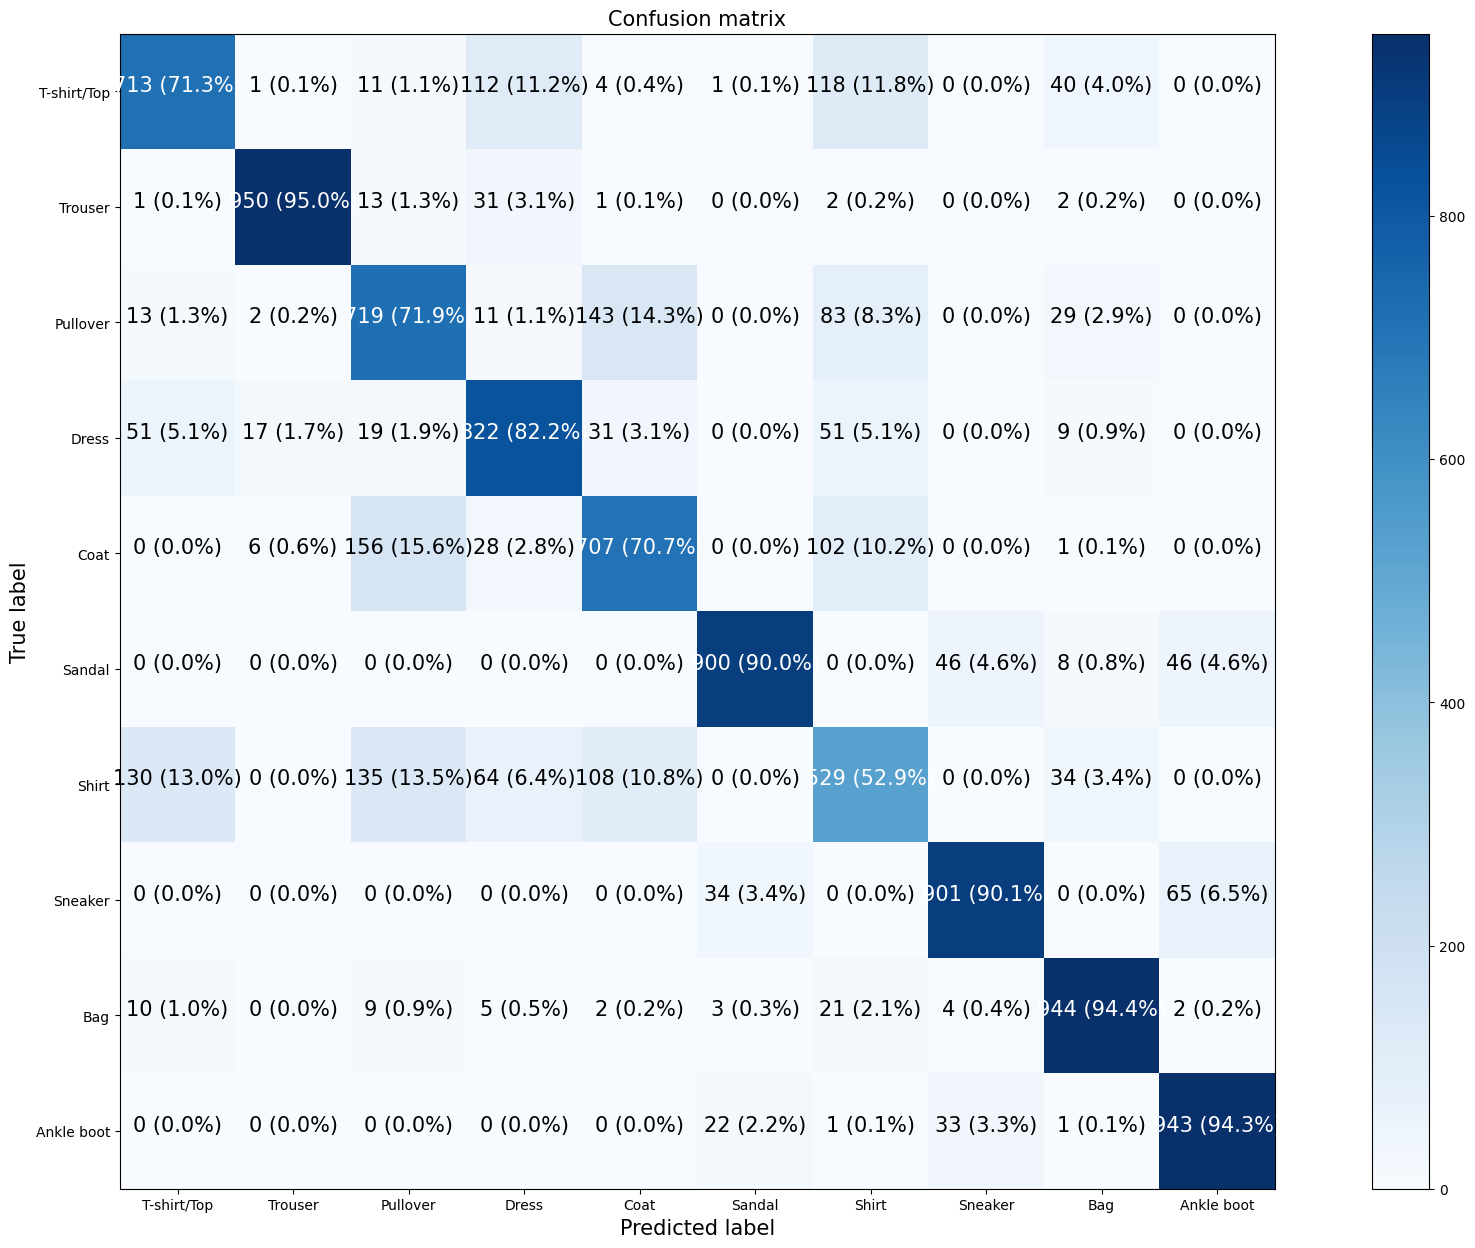

In [ ]:
# pretty confusion matrix
make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize=(25,15),
    text_size=15
)

**Note:** Often when working with images and other form of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of our model

Create a function to do so:
 * Plot a random image
 * Make a prediction on said image
 * Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predcition and truth labels
  """

  # set up random integer
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(images)))

  # create predciton and targbets
  target_image = images[rand_index]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[rand_index]]

  # plot the image
  plt.imshow(target_image[rand_index], cmap=plt.cm.binary)

  # .change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color= "red"

  # add xlabel information(predcition/true label)
  plt.xlabel("Pred:{}{:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),color=color)

1/1 [==============================] - 0s 22ms/step


IndexError: ignored

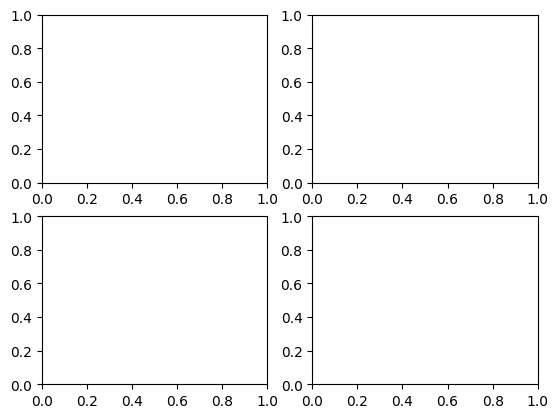

In [ ]:
plot_random_image(model=model_13, images=test_data_norm, true_labels=test_labels, classes=class_names)

In [ ]:
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## What patterns is our model?

In [ ]:
# find the layers of most recent model
model_13.layers

In [ ]:
# extravt a particular layer
model_13.layers[0]

In [ ]:
# get the patterns of a layers in our network
weights, biases = model_13.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.8023527 ,  0.02456411,  0.68772346, -0.69257295],
        [ 0.11977166,  0.99649376,  0.8324106 , -0.0145939 ],
        [ 0.9802803 ,  1.0514247 ,  0.49467295, -0.73990023],
        ...,
        [ 0.04237965, -0.53640044,  0.07759534,  0.47908208],
        [ 0.60202795,  0.12253918, -0.14463584,  0.9249976 ],
        [ 0.69214416, -0.2360102 ,  0.63619757, -0.00639502]],
       dtype=float32),
 (784, 4))

Now, let's checkout bias vector

In [ ]:
biases, biases.shape

(array([1.251529 , 3.3847697, 2.2235563, 1.8382065], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with the weights matrix.

The bias vector get initialized as zeros(at least in the case of tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

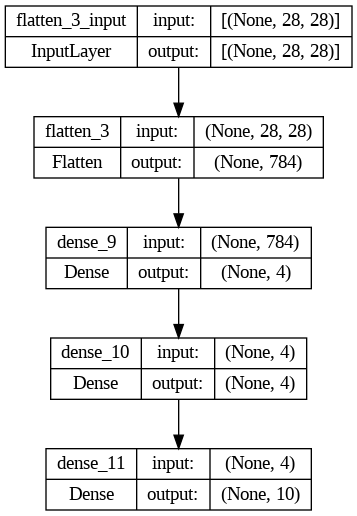

In [ ]:
# let's check out another way of viewing deeplearning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of the model
plot_model(model_13, show_shapes=True)